<a href="https://colab.research.google.com/github/ted-marlon/Data-Science/blob/main/Bankrupt_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Nous constatons que notre base de données comporte 6819 lignes et 96 colomne.
Aucune variable ne présente des valeurs manquantes..

In [ ]:
data.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


Renommons nos variables en français pour une meilleur compréhension..

In [ ]:
data.columns = data.columns.str.strip()  # Supprime les espaces au début et à la fin
noms_fr = {
    "Bankrupt?": "Faillite",
    "ROA(C) before interest and depreciation before interest": "ROA_C_avant_int_dep",
    "ROA(A) before interest and % after tax": "ROA_A_avant_int_apres_impot",
    "ROA(B) before interest and depreciation after tax": "ROA_B_avant_int_dep_apres_impot",
    "Operating Gross Margin": "Marge_brute_exploitation",
    "Realized Sales Gross Margin": "Marge_brute_ventes_realisees",
    "Operating Profit Rate": "Taux_profit_exploitation",
    "Pre-tax net Interest Rate": "Taux_interet_net_avant_impot",
    "After-tax net Interest Rate": "Taux_interet_net_apres_impot",
    "Non-industry income and expenditure/revenue": "Revenu_depenses_hors_industrie",
    "Continuous interest rate (after tax)": "Taux_interet_continu_apres_impot",
    "Operating Expense Rate": "Taux_depenses_exploitation",
    "Research and development expense rate": "Taux_depenses_R&D",
    "Cash flow rate": "Taux_flux_tresorerie",
    "Interest-bearing debt interest rate": "Taux_interet_dette_portant_interets",
    "Tax rate (A)": "Taux_imposition_A",
    "Net Value Per Share (B)": "Valeur_nette_par_action_B",
    "Net Value Per Share (A)": "Valeur_nette_par_action_A",
    "Net Value Per Share (C)": "Valeur_nette_par_action_C",
    "Persistent EPS in the Last Four Seasons": "BPA_constant_4_saisons",
    "Cash Flow Per Share": "Flux_tresorerie_par_action",
    "Revenue Per Share (Yuan ¥)": "Revenu_par_action",
    "Operating Profit Per Share (Yuan ¥)": "Profit_exploitation_par_action",
    "Per Share Net profit before tax (Yuan ¥)": "Profit_net_par_action_avant_impot",
    "Realized Sales Gross Profit Growth Rate": "Taux_croissance_marge_brute_ventes",
    "Operating Profit Growth Rate": "Taux_croissance_profit_exploitation",
    "After-tax Net Profit Growth Rate": "Taux_croissance_profit_net_apres_impot",
    "Regular Net Profit Growth Rate": "Taux_croissance_profit_net_regulier",
    "Continuous Net Profit Growth Rate": "Taux_croissance_profit_net_continu",
    "Total Asset Growth Rate": "Taux_croissance_actif_total",
    "Net Value Growth Rate": "Taux_croissance_valeur_nette",
    "Total Asset Return Growth Rate Ratio": "Taux_croissance_rendement_actifs",
    "Cash Reinvestment %": "Reinvestissement_tresorerie_pct",
    "Current Ratio": "Ratio_courant",
    "Quick Ratio": "Ratio_rapide",
    "Interest Expense Ratio": "Ratio_depenses_interets",
    "Total debt/Total net worth": "Dette_totale_sur_valeur_nette",
    "Debt ratio %": "Ratio_endettement_pct",
    "Net worth/Assets": "Valeur_nette_sur_actifs",
    "Long-term fund suitability ratio (A)": "Ratio_adequation_fonds_LT_A",
    "Borrowing dependency": "Dependance_emprunt",
    "Contingent liabilities/Net worth": "Passifs_eventuels_sur_valeur_nette",
    "Operating profit/Paid-in capital": "Profit_exploitation_sur_capital_libere",
    "Net profit before tax/Paid-in capital": "Profit_net_avant_impot_sur_capital_libere",
    "Inventory and accounts receivable/Net value": "Stock_et_creances_sur_valeur_nette",
    "Total Asset Turnover": "Rotation_actifs_totaux",
    "Accounts Receivable Turnover": "Rotation_creances_clients",
    "Average Collection Days": "Delai_moyen_recouvrement",
    "Inventory Turnover Rate (times)": "Taux_rotation_stocks",
    "Fixed Assets Turnover Frequency": "Rotation_actifs_fixes",
    "Net Worth Turnover Rate (times)": "Rotation_valeur_nette",
    "Revenue per person": "Revenu_par_employe",
    "Operating profit per person": "Profit_exploitation_par_employe",
    "Allocation rate per person": "Taux_affectation_par_employe",
    "Working Capital to Total Assets": "Fonds_roulement_sur_actifs_totaux",
    "Quick Assets/Total Assets": "Actifs_rapides_sur_actifs_totaux",
    "Current Assets/Total Assets": "Actifs_courants_sur_actifs_totaux",
    "Cash/Total Assets": "Tresorerie_sur_actifs_totaux",
    "Quick Assets/Current Liability": "Actifs_rapides_sur_passifs_courants",
    "Cash/Current Liability": "Tresorerie_sur_passifs_courants",
    "Current Liability to Assets": "Passifs_courants_sur_actifs",
    "Operating Funds to Liability": "Fonds_exploitation_sur_passif",
    "Inventory/Working Capital": "Stocks_sur_fonds_roulement",
    "Inventory/Current Liability": "Stocks_sur_passifs_courants",
    "Current Liabilities/Liability": "Passifs_courants_sur_passif_total",
    "Working Capital/Equity": "Fonds_roulement_sur_fonds_propres",
    "Current Liabilities/Equity": "Passifs_courants_sur_fonds_propres",
    "Long-term Liability to Current Assets": "Passifs_LT_sur_actifs_courants",
    "Retained Earnings to Total Assets": "Benefices_non_repartis_sur_actifs",
    "Total income/Total expense": "Revenus_totaux_sur_depenses_totales",
    "Total expense/Assets": "Depenses_totales_sur_actifs",
    "Current Asset Turnover Rate": "Rotation_actifs_courants",
    "Quick Asset Turnover Rate": "Rotation_actifs_rapides",
    "Working capitcal Turnover Rate": "Rotation_fonds_roulement",
    "Cash Turnover Rate": "Rotation_tresorerie",
    "Cash Flow to Sales": "Flux_tresorerie_sur_ventes",
    "Fixed Assets to Assets": "Actifs_fixes_sur_actifs_totaux",
    "Current Liability to Liability": "Passifs_courants_sur_passif_total",
    "Current Liability to Equity": "Passifs_courants_sur_capitaux_propres",
    "Equity to Long-term Liability": "Capitaux_propres_sur_passifs_LT",
    "Cash Flow to Total Assets": "Flux_tresorerie_sur_actifs_totaux",
    "Cash Flow to Liability": "Flux_tresorerie_sur_passif",
    "CFO to Assets": "Flux_exploitation_sur_actifs",
    "Cash Flow to Equity": "Flux_tresorerie_sur_fonds_propres",
    "Current Liability to Current Assets": "Passifs_courants_sur_actifs_courants",
    "Liability-Assets Flag": "Indic_endettement_actifs",
    "Net Income to Total Assets": "Revenu_net_sur_actifs",
    "Total assets to GNP price": "Actifs_totaux_sur_PIB",
    "No-credit Interval": "Intervalle_sans_credit",
    "Gross Profit to Sales": "Marge_brute_sur_ventes",
    "Net Income to Stockholder's Equity": "Revenu_net_sur_fonds_propres",
    "Liability to Equity": "Passif_sur_capitaux_propres",
    "Degree of Financial Leverage (DFL)": "Levier_financier",
    "Interest Coverage Ratio (Interest expense to EBIT)": "Couverture_interets",
    "Net Income Flag": "Indic_revenu_net",
    "Equity to Liability": "Fonds_propres_sur_passif"
}
data.rename(columns=noms_fr, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Faillite                                   6819 non-null   int64  
 1   ROA_C_avant_int_dep                        6819 non-null   float64
 2   ROA_A_avant_int_apres_impot                6819 non-null   float64
 3   ROA_B_avant_int_dep_apres_impot            6819 non-null   float64
 4   Marge_brute_exploitation                   6819 non-null   float64
 5   Marge_brute_ventes_realisees               6819 non-null   float64
 6   Taux_profit_exploitation                   6819 non-null   float64
 7   Taux_interet_net_avant_impot               6819 non-null   float64
 8   Taux_interet_net_apres_impot               6819 non-null   float64
 9   Revenu_depenses_hors_industrie             6819 non-null   float64
 10  Taux_interet_continu_apr

In [ ]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r',
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu',
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary',
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare',
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot',
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20',
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight',
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

Faillite
0    6599
1     220
Name: count, dtype: int64


/tmp/ipython-input-1410675347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Faillite',data=data,palette = colors[value])


<Axes: xlabel='Faillite', ylabel='count'>

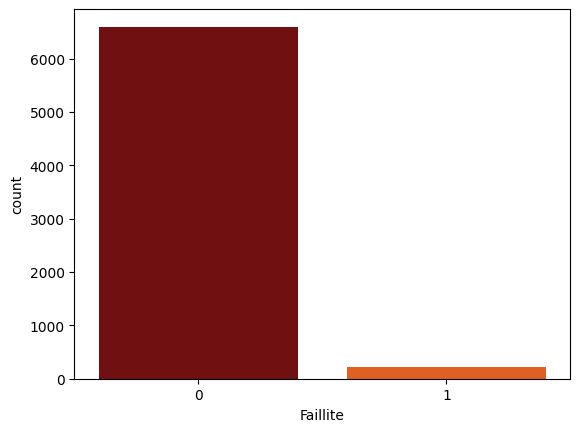

In [ ]:
value = randint(0, len(colors)-1)
print(data['Faillite'].value_counts())
sns.countplot(x='Faillite',data=data,palette = colors[value])

Nous voyons très bien à partir de ce graphique que la districution des données de notre valeur cible est déséquilibré..
Cela peut impacter les performances de notre modèle. Pour résoudre ce problème,nous pouvons utiliser les méthodes de sur-échnatillonage ou de sous-échantillonage.

In [ ]:
num_var = data.dtypes[data.dtypes != 'int64'].index
cat_var = data.dtypes[data.dtypes == 'int64'].index

data[cat_var].columns.tolist()

['Faillite', 'Indic_endettement_actifs', 'Indic_revenu_net']

Notre base de données comporte trois variables catégorielles à savoir Faillite, Indice d'endettemet_actifs et l'indice de revenu net.
Commencons à analyser les deux dernières variables pour avoir une idée de leur impact sur la valeur cible..

Indic_endettement_actifs
0    6811
1       8
Name: count, dtype: int64


/tmp/ipython-input-1265284367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Indic_endettement_actifs',data=data,palette = colors[value])


<Axes: xlabel='Indic_endettement_actifs', ylabel='count'>

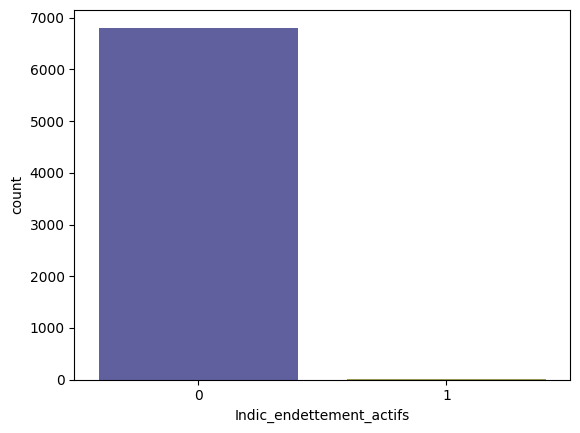

In [ ]:
value = randint(0, len(colors)-1)
print(data['Indic_endettement_actifs'].value_counts())
sns.countplot(x='Indic_endettement_actifs',data=data,palette = colors[value])

L’indice d’endettement actifs (ou ratio d’endettement basé sur les actifs) est un indicateur financier qui mesure la part des dettes d’une entreprise par rapport à ses actifs totaux.
Cet indice indique l’état d’une organisation. Si le total des passifs dépasse le total des actifs, la valeur du drapeau est 1, sinon elle est 0. La plupart du temps, les actifs des organisations/entreprises sont supérieurs à leurs passifs.

Indic_endettement_actifs  Faillite
0                         0           6597
                          1            214
1                         1              6
                          0              2
Name: count, dtype: int64


<Axes: xlabel='Indic_endettement_actifs', ylabel='count'>

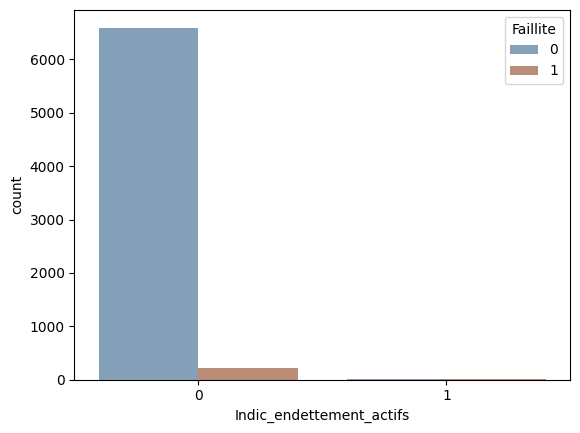

In [ ]:
value = randint(0, len(colors)-1)

print(data[['Indic_endettement_actifs','Faillite']].value_counts())
sns.countplot(x='Indic_endettement_actifs',hue='Faillite',data = data,palette = colors[value])

A travers ce graphe nous pouvons voir que certaines entreprises souffrent de la faillite en débit du fait d'avoir un bon indice d'endettement d'actifs..

Indic_revenu_net
1    6819
Name: count, dtype: int64


/tmp/ipython-input-577251831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Indic_revenu_net',data=data,palette = colors[value])


<Axes: xlabel='Indic_revenu_net', ylabel='count'>

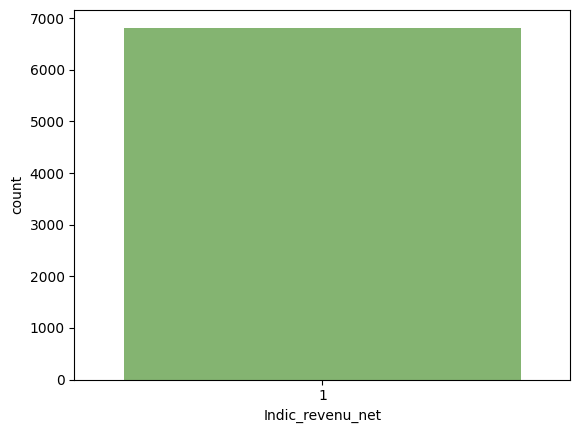

In [ ]:
value = randint(0, len(colors)-1)
print(data['Indic_revenu_net'].value_counts())
sns.countplot(x='Indic_revenu_net',data=data,palette = colors[value])

😅Incroyable,dans notre base de données,toutes les entreprises ont un excellent indice de revenu net...Je pense que cette variable n'a pas un grand impact sur notre variable cible mais creusons un peu plus en profondeur..

Indic_revenu_net  Faillite
1                 0           6599
                  1            220
Name: count, dtype: int64


<Axes: xlabel='Indic_revenu_net', ylabel='count'>

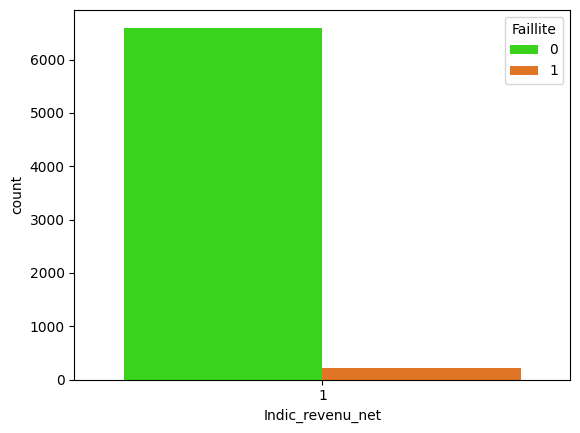

In [ ]:
value = randint(0, len(colors)-1)

print(data[['Indic_revenu_net','Faillite']].value_counts())
sns.countplot(x='Indic_revenu_net',hue='Faillite',data = data,palette = colors[value])

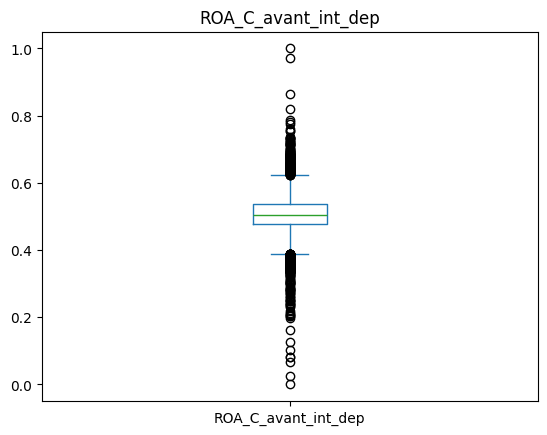

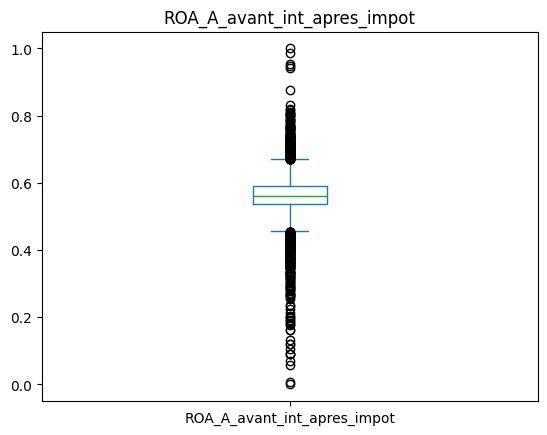

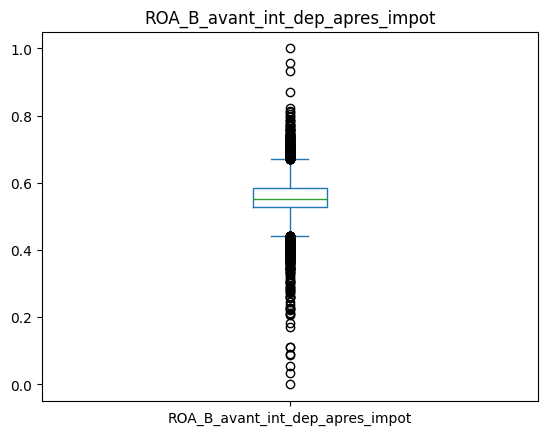

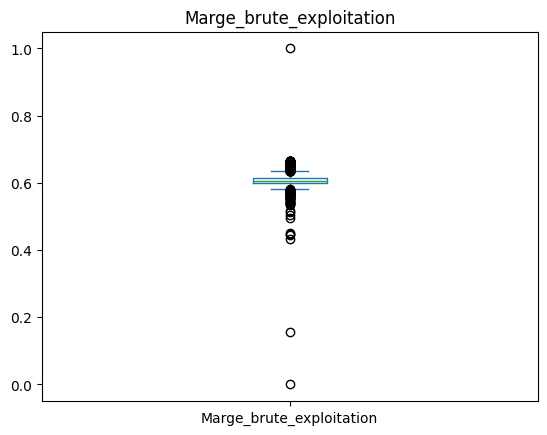

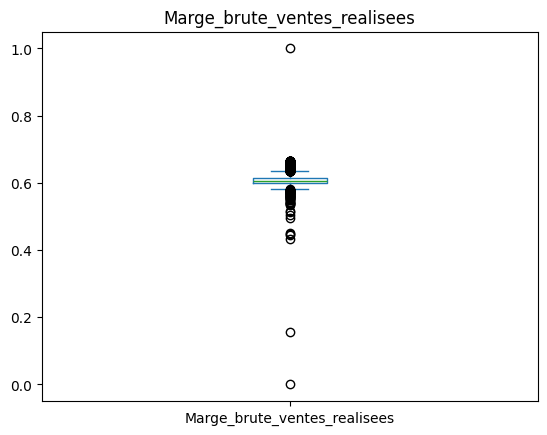

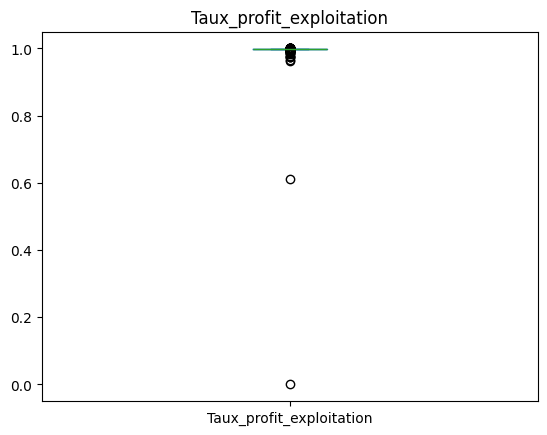

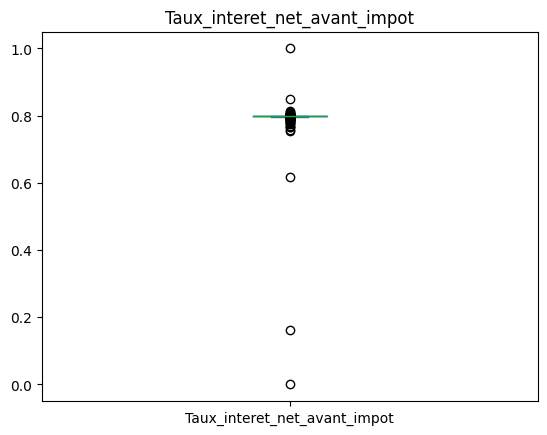

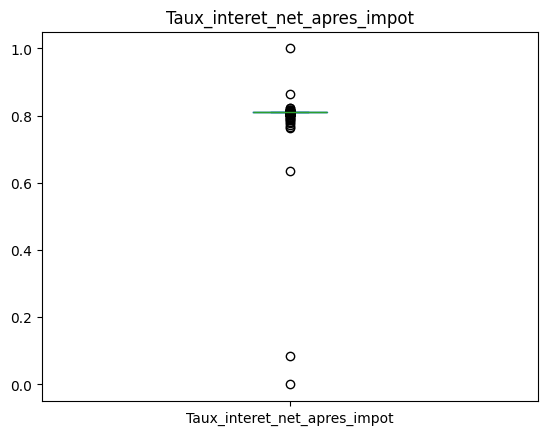

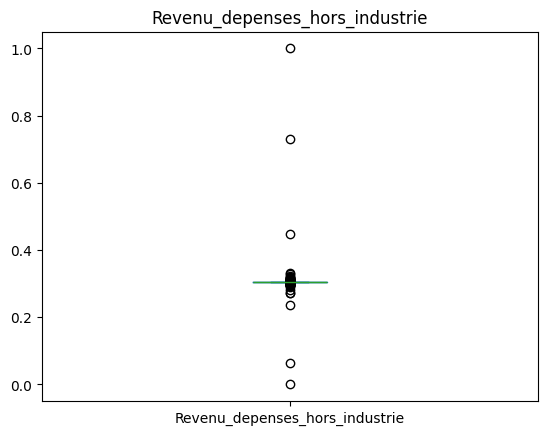

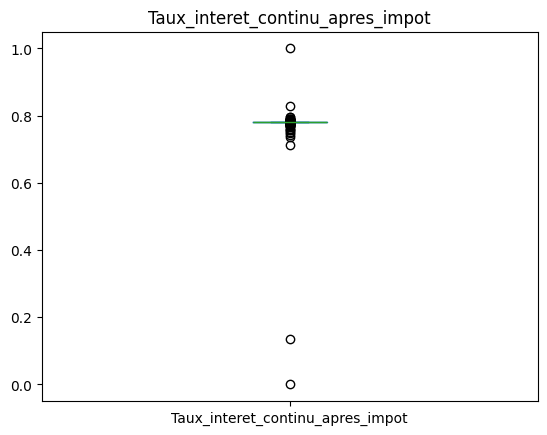

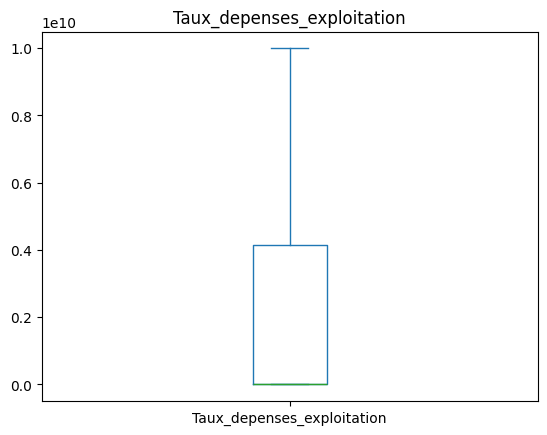

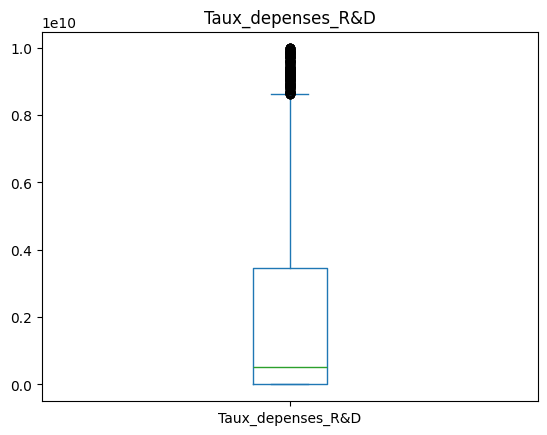

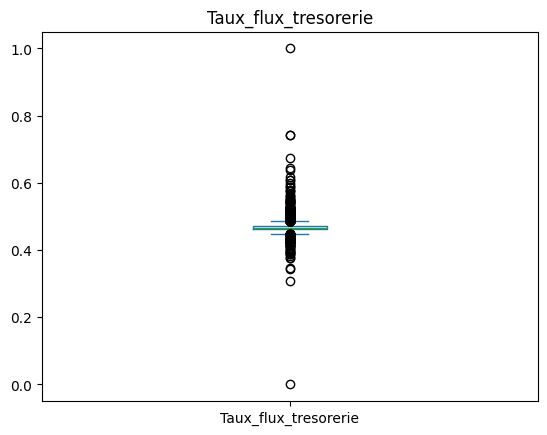

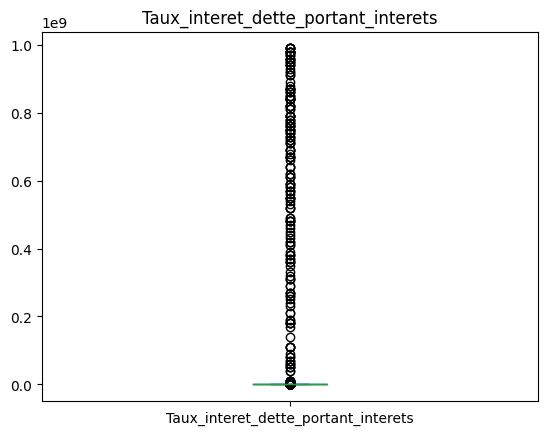

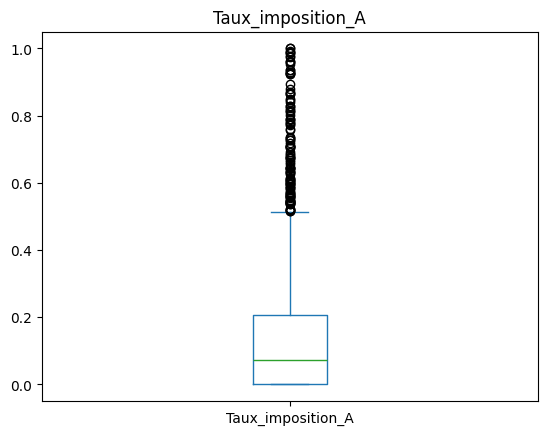

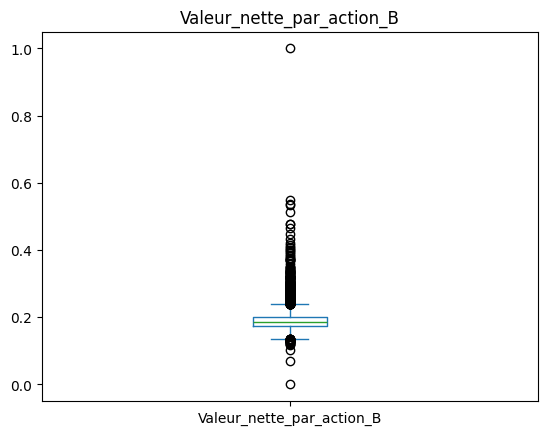

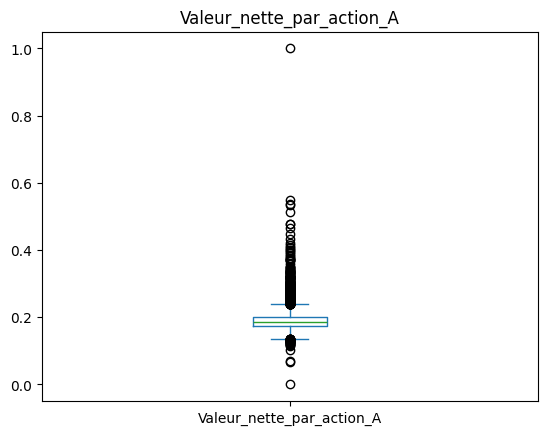

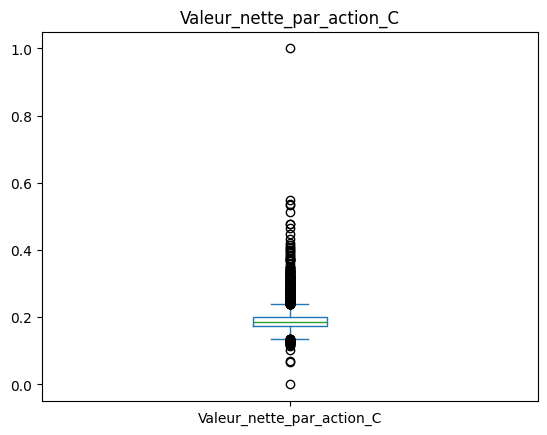

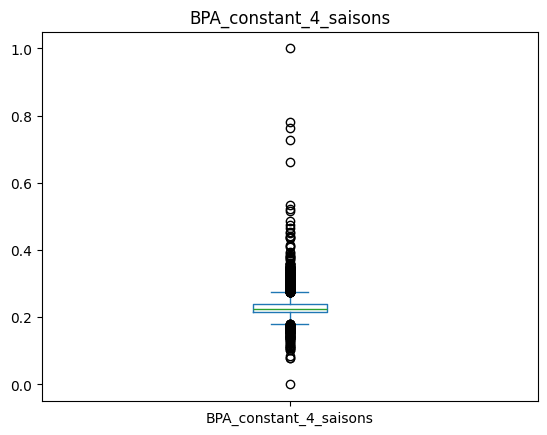

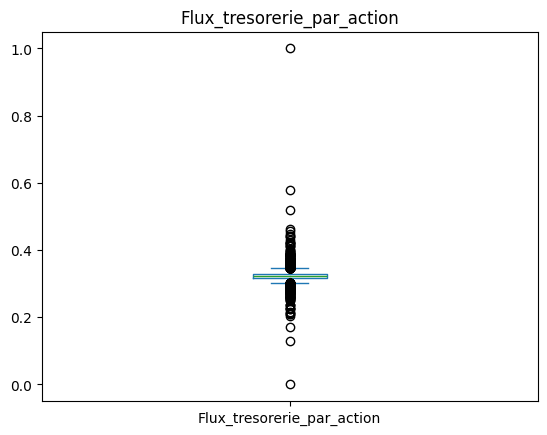

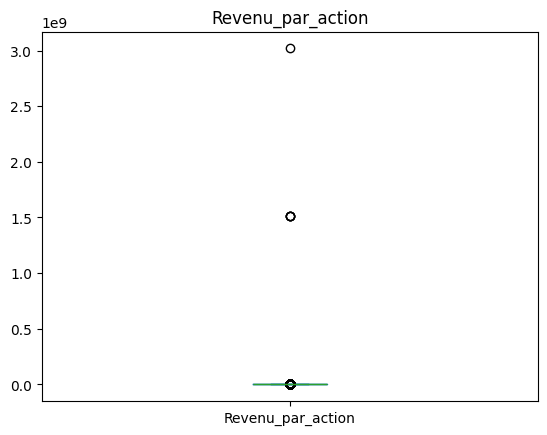

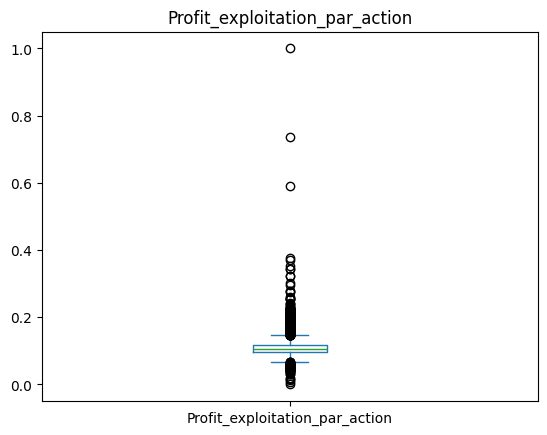

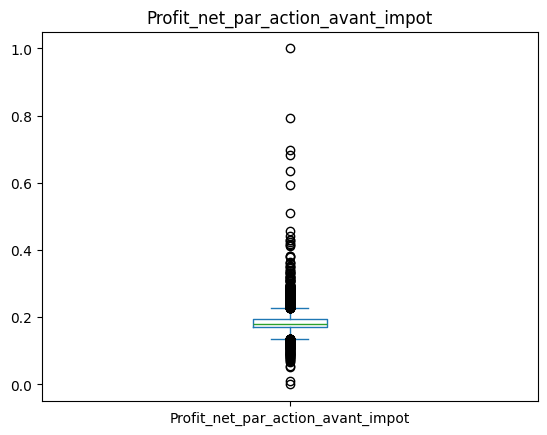

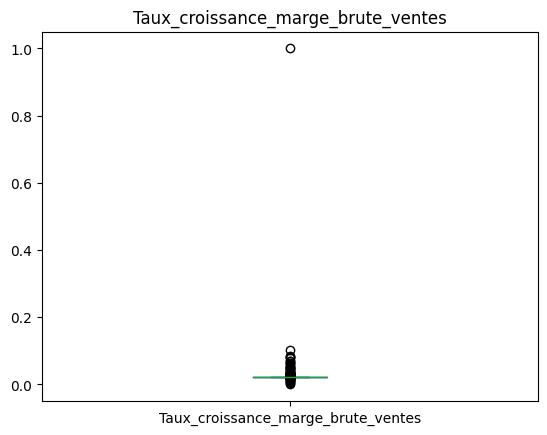

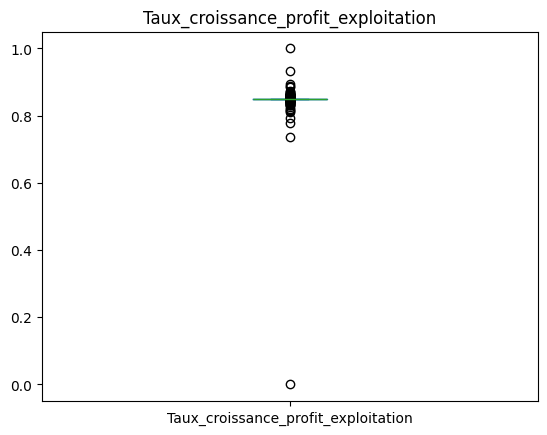

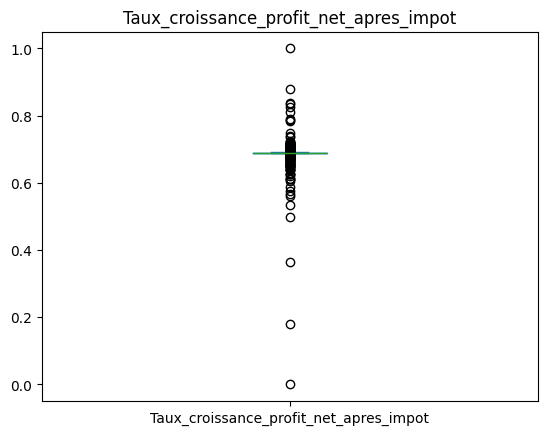

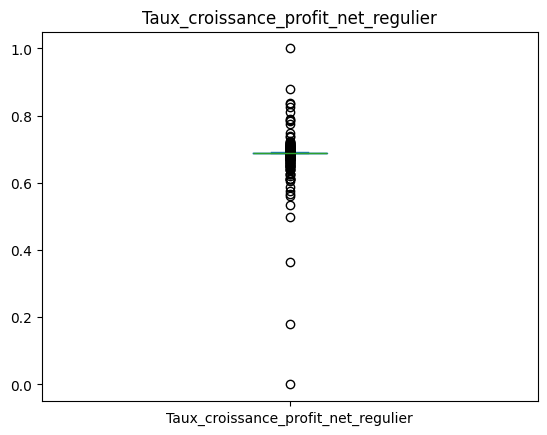

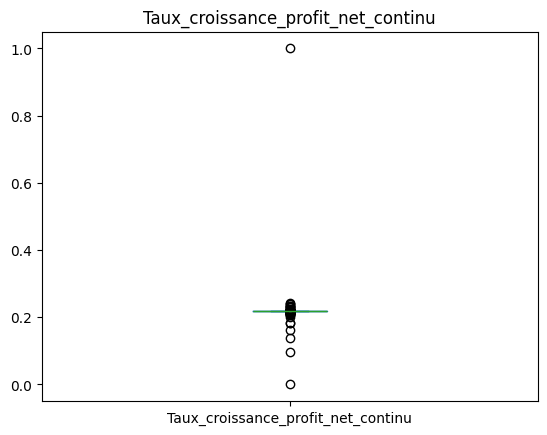

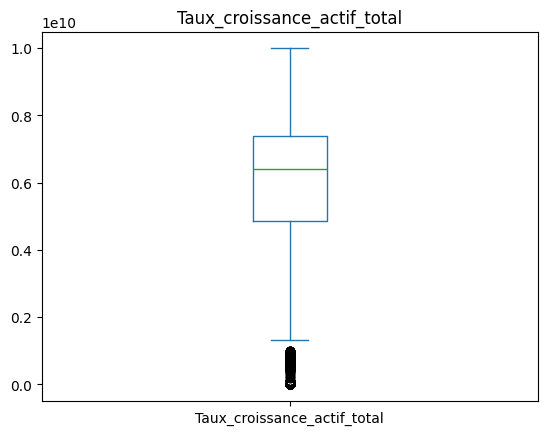

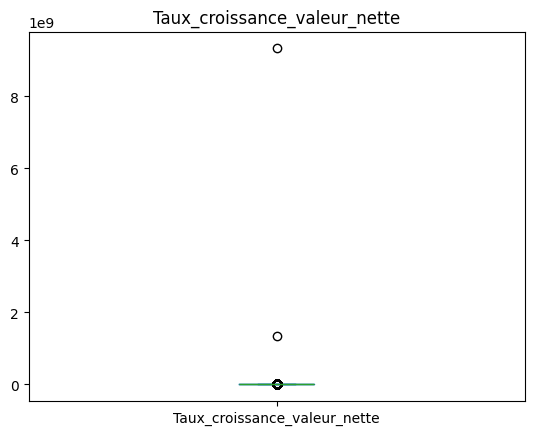

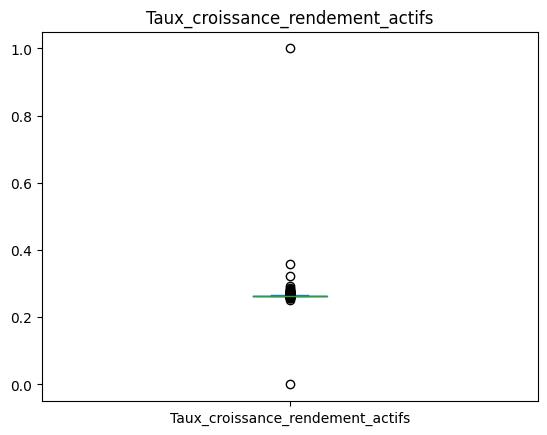

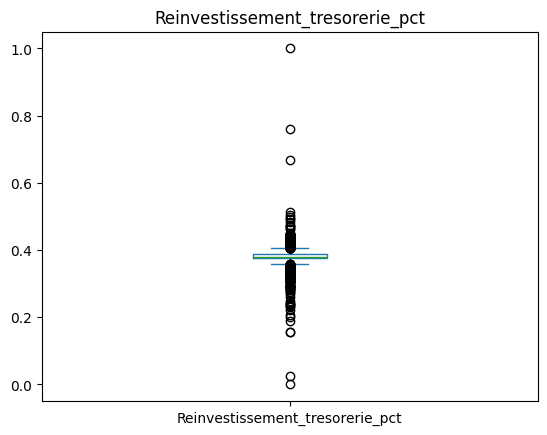

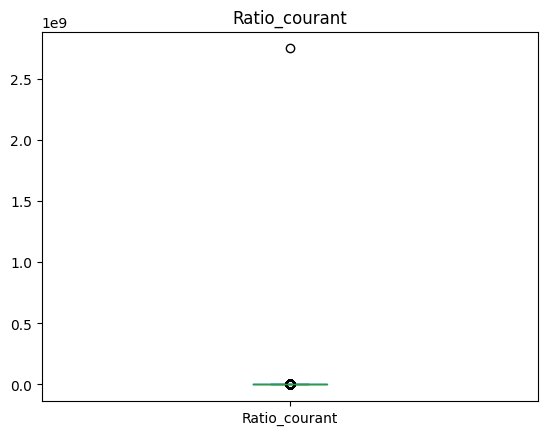

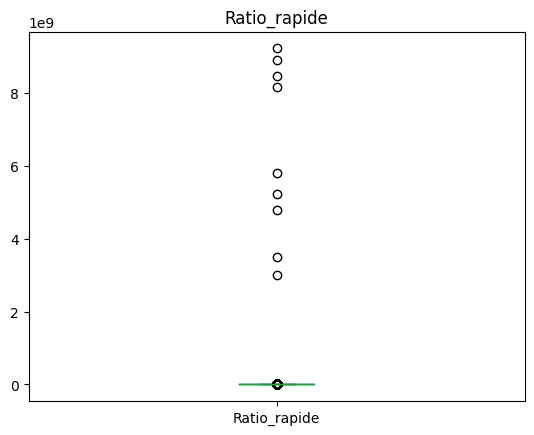

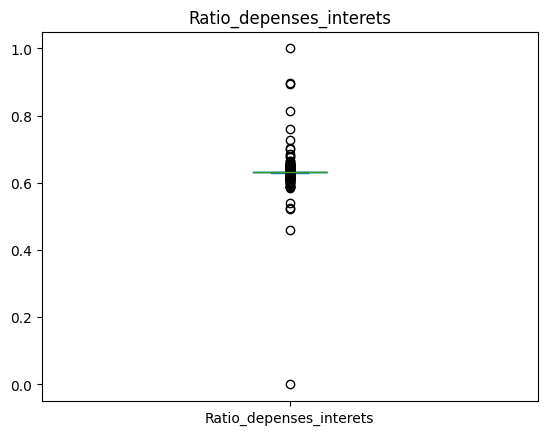

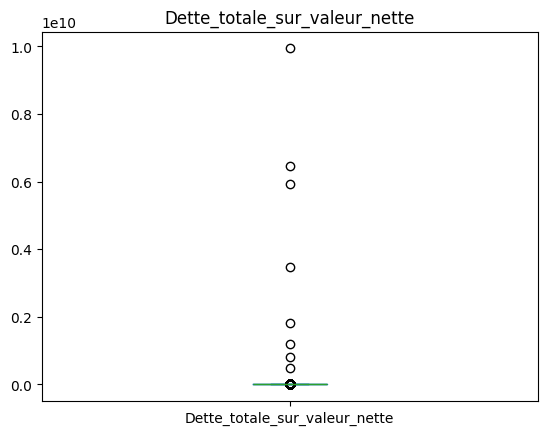

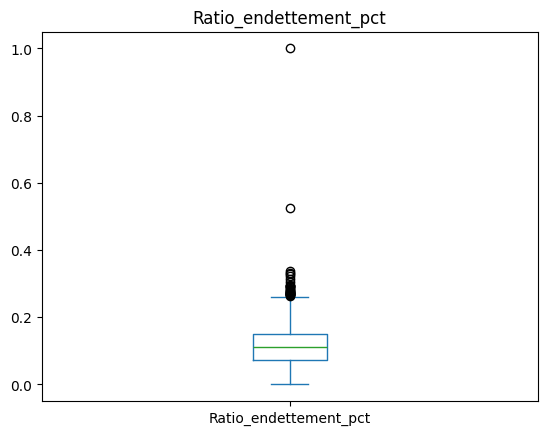

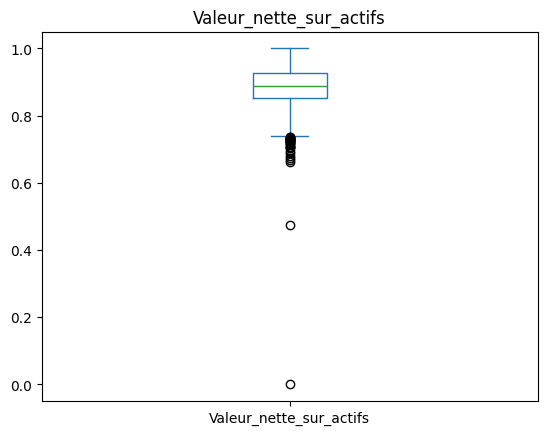

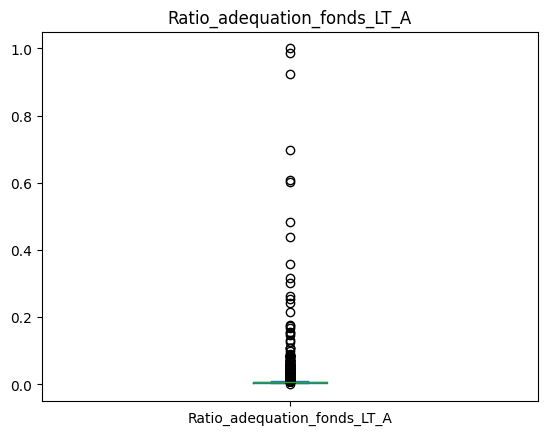

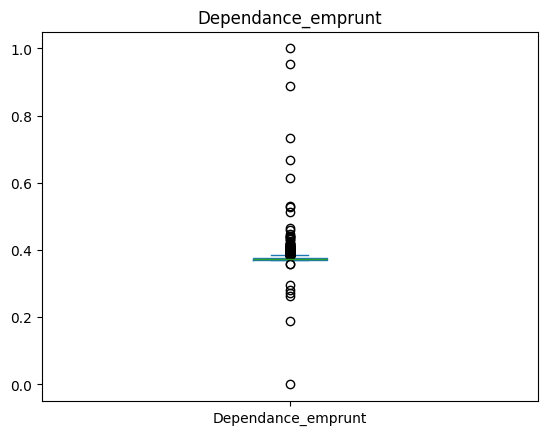

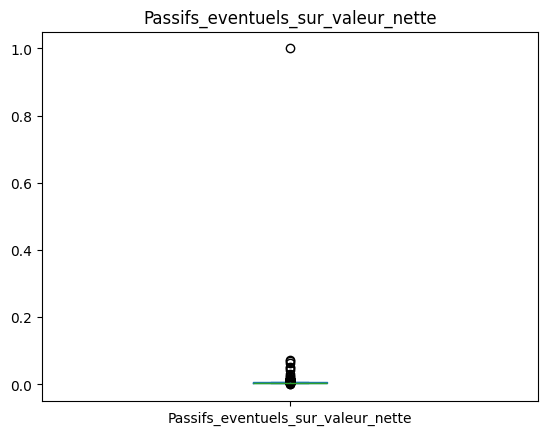

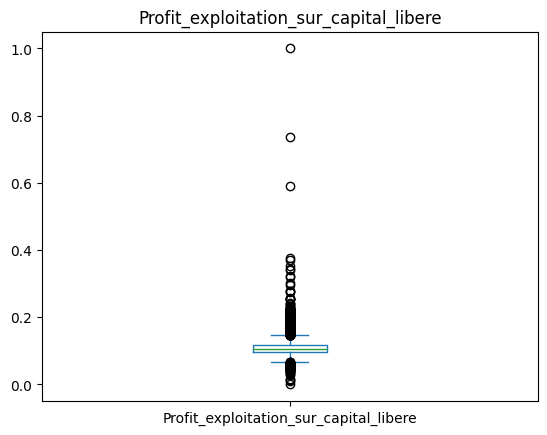

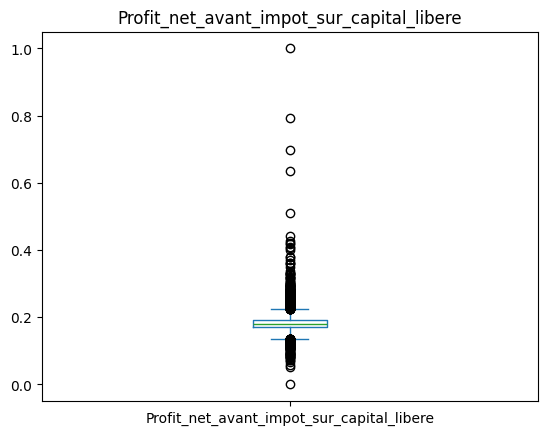

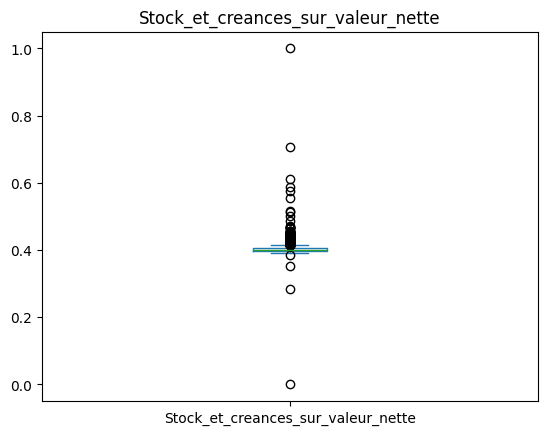

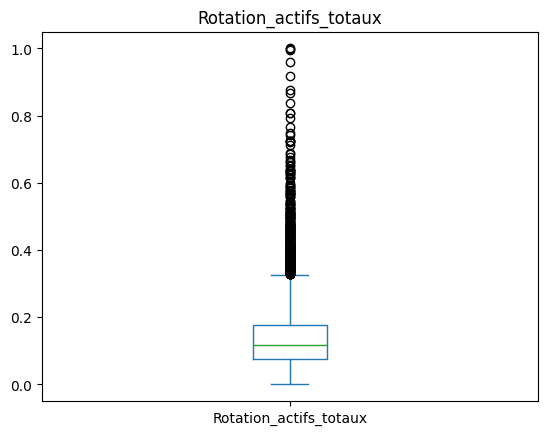

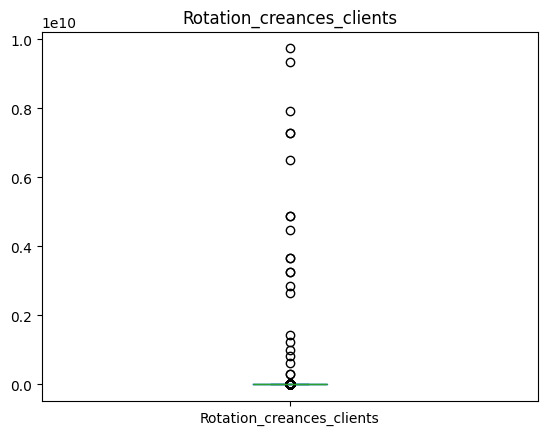

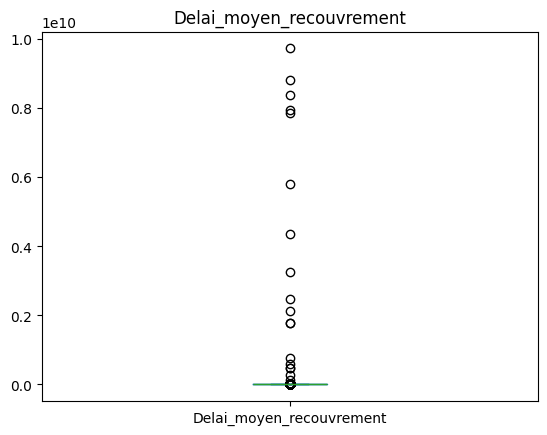

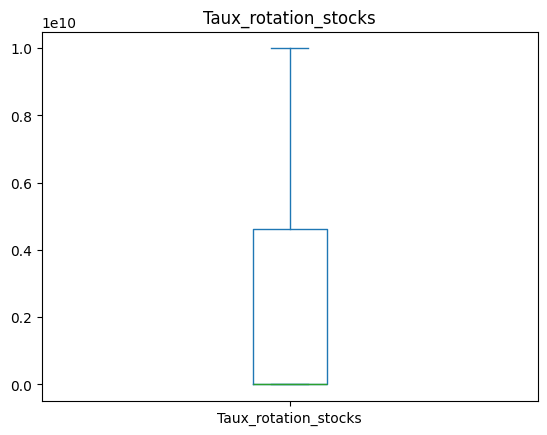

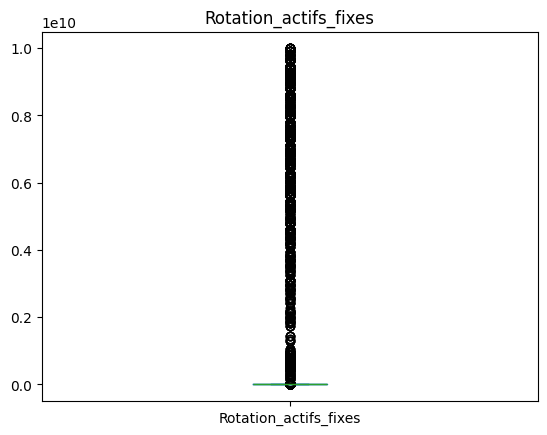

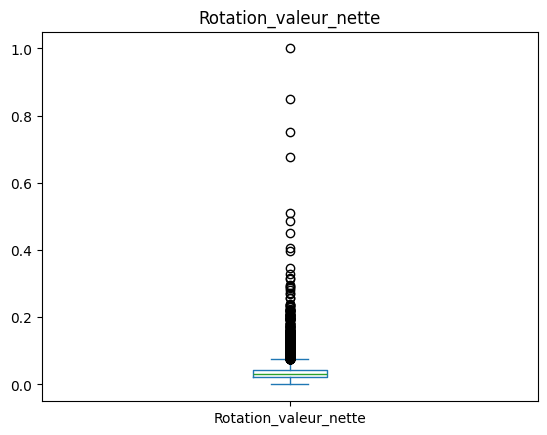

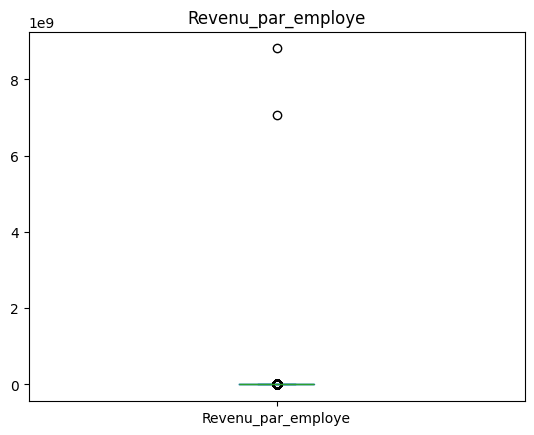

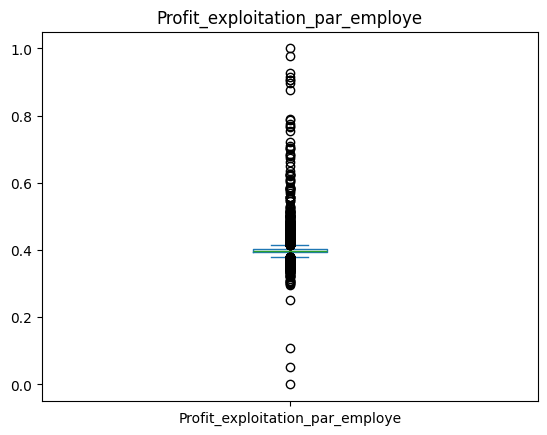

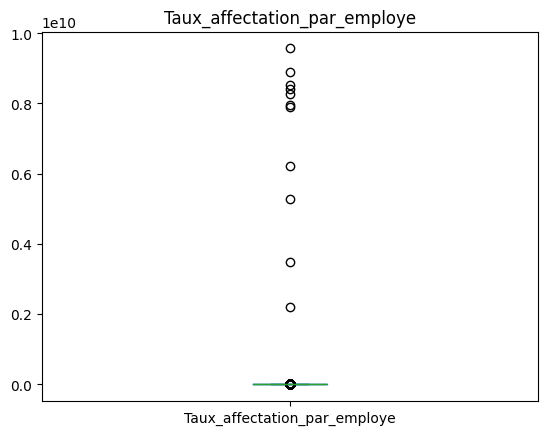

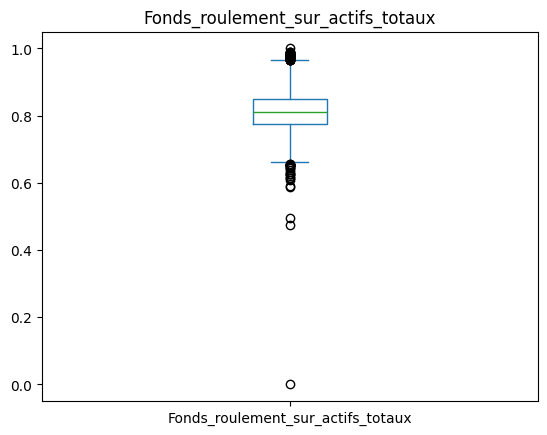

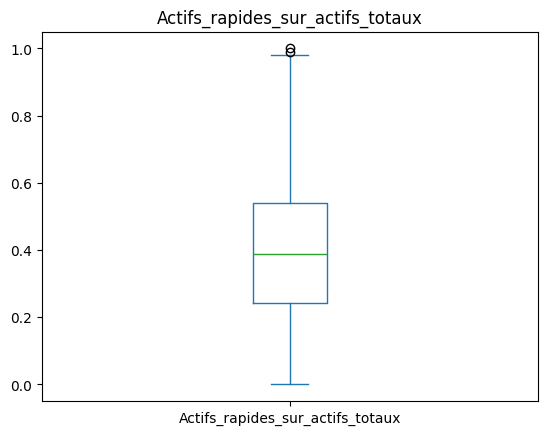

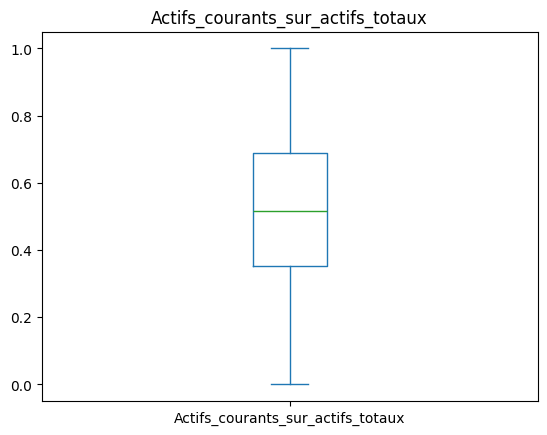

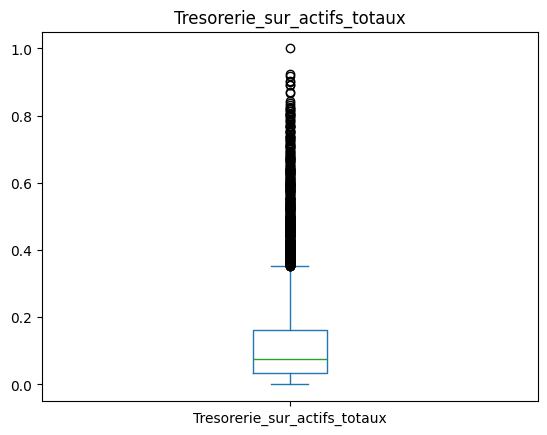

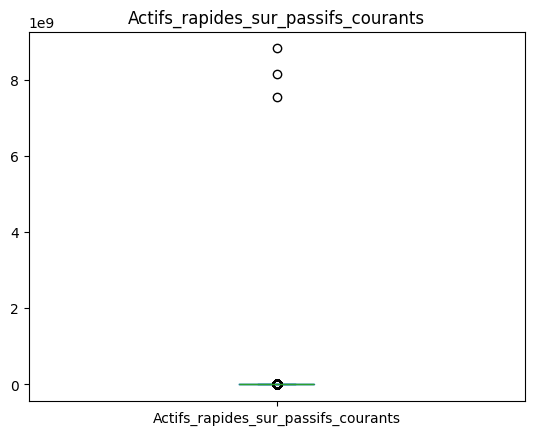

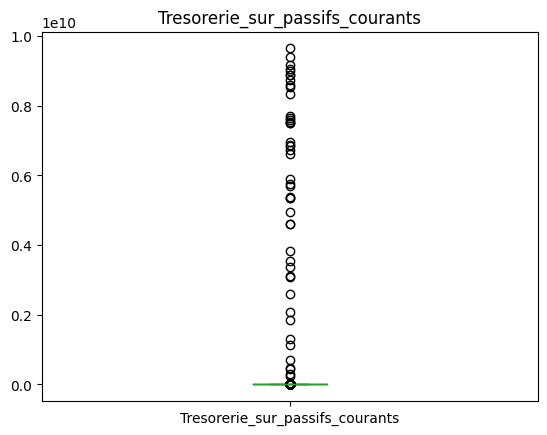

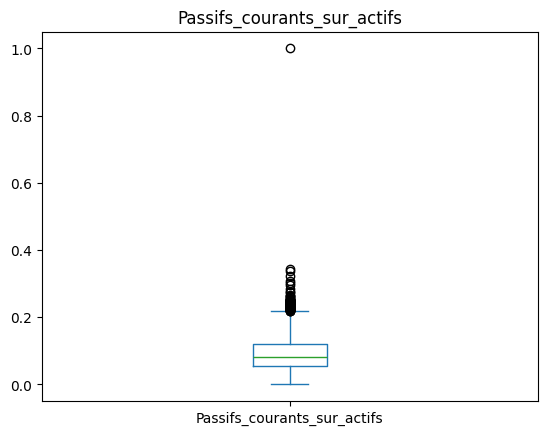

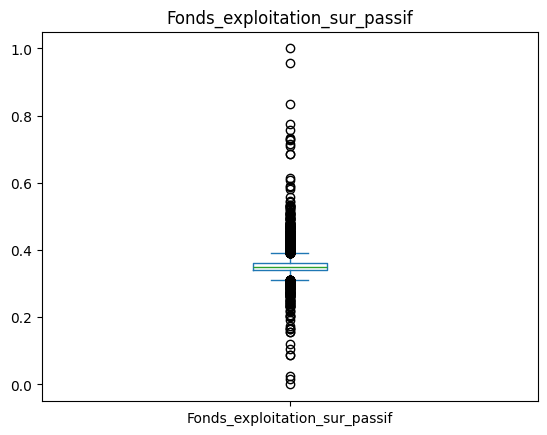

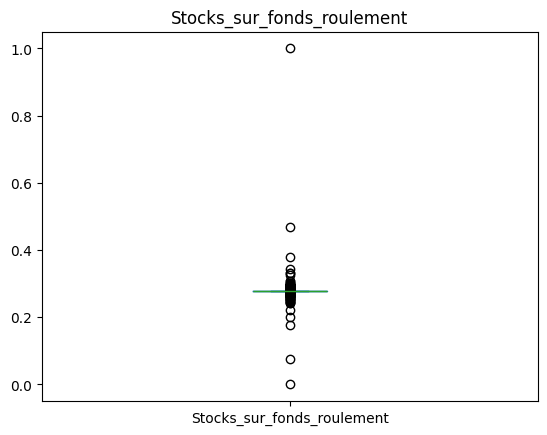

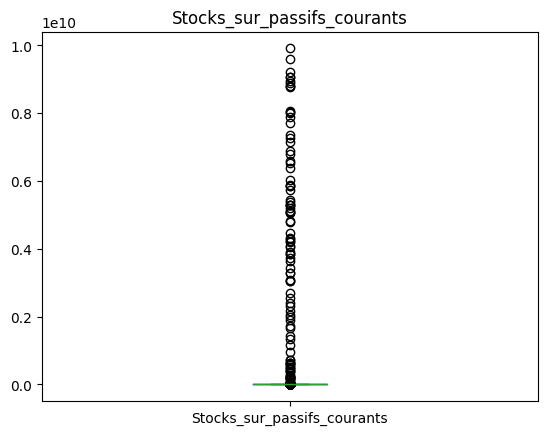

TypeError: no numeric data to plot

In [ ]:
for var in num_var:
     data[var].plot(kind='box')
     plt.title(var)
     plt.show()

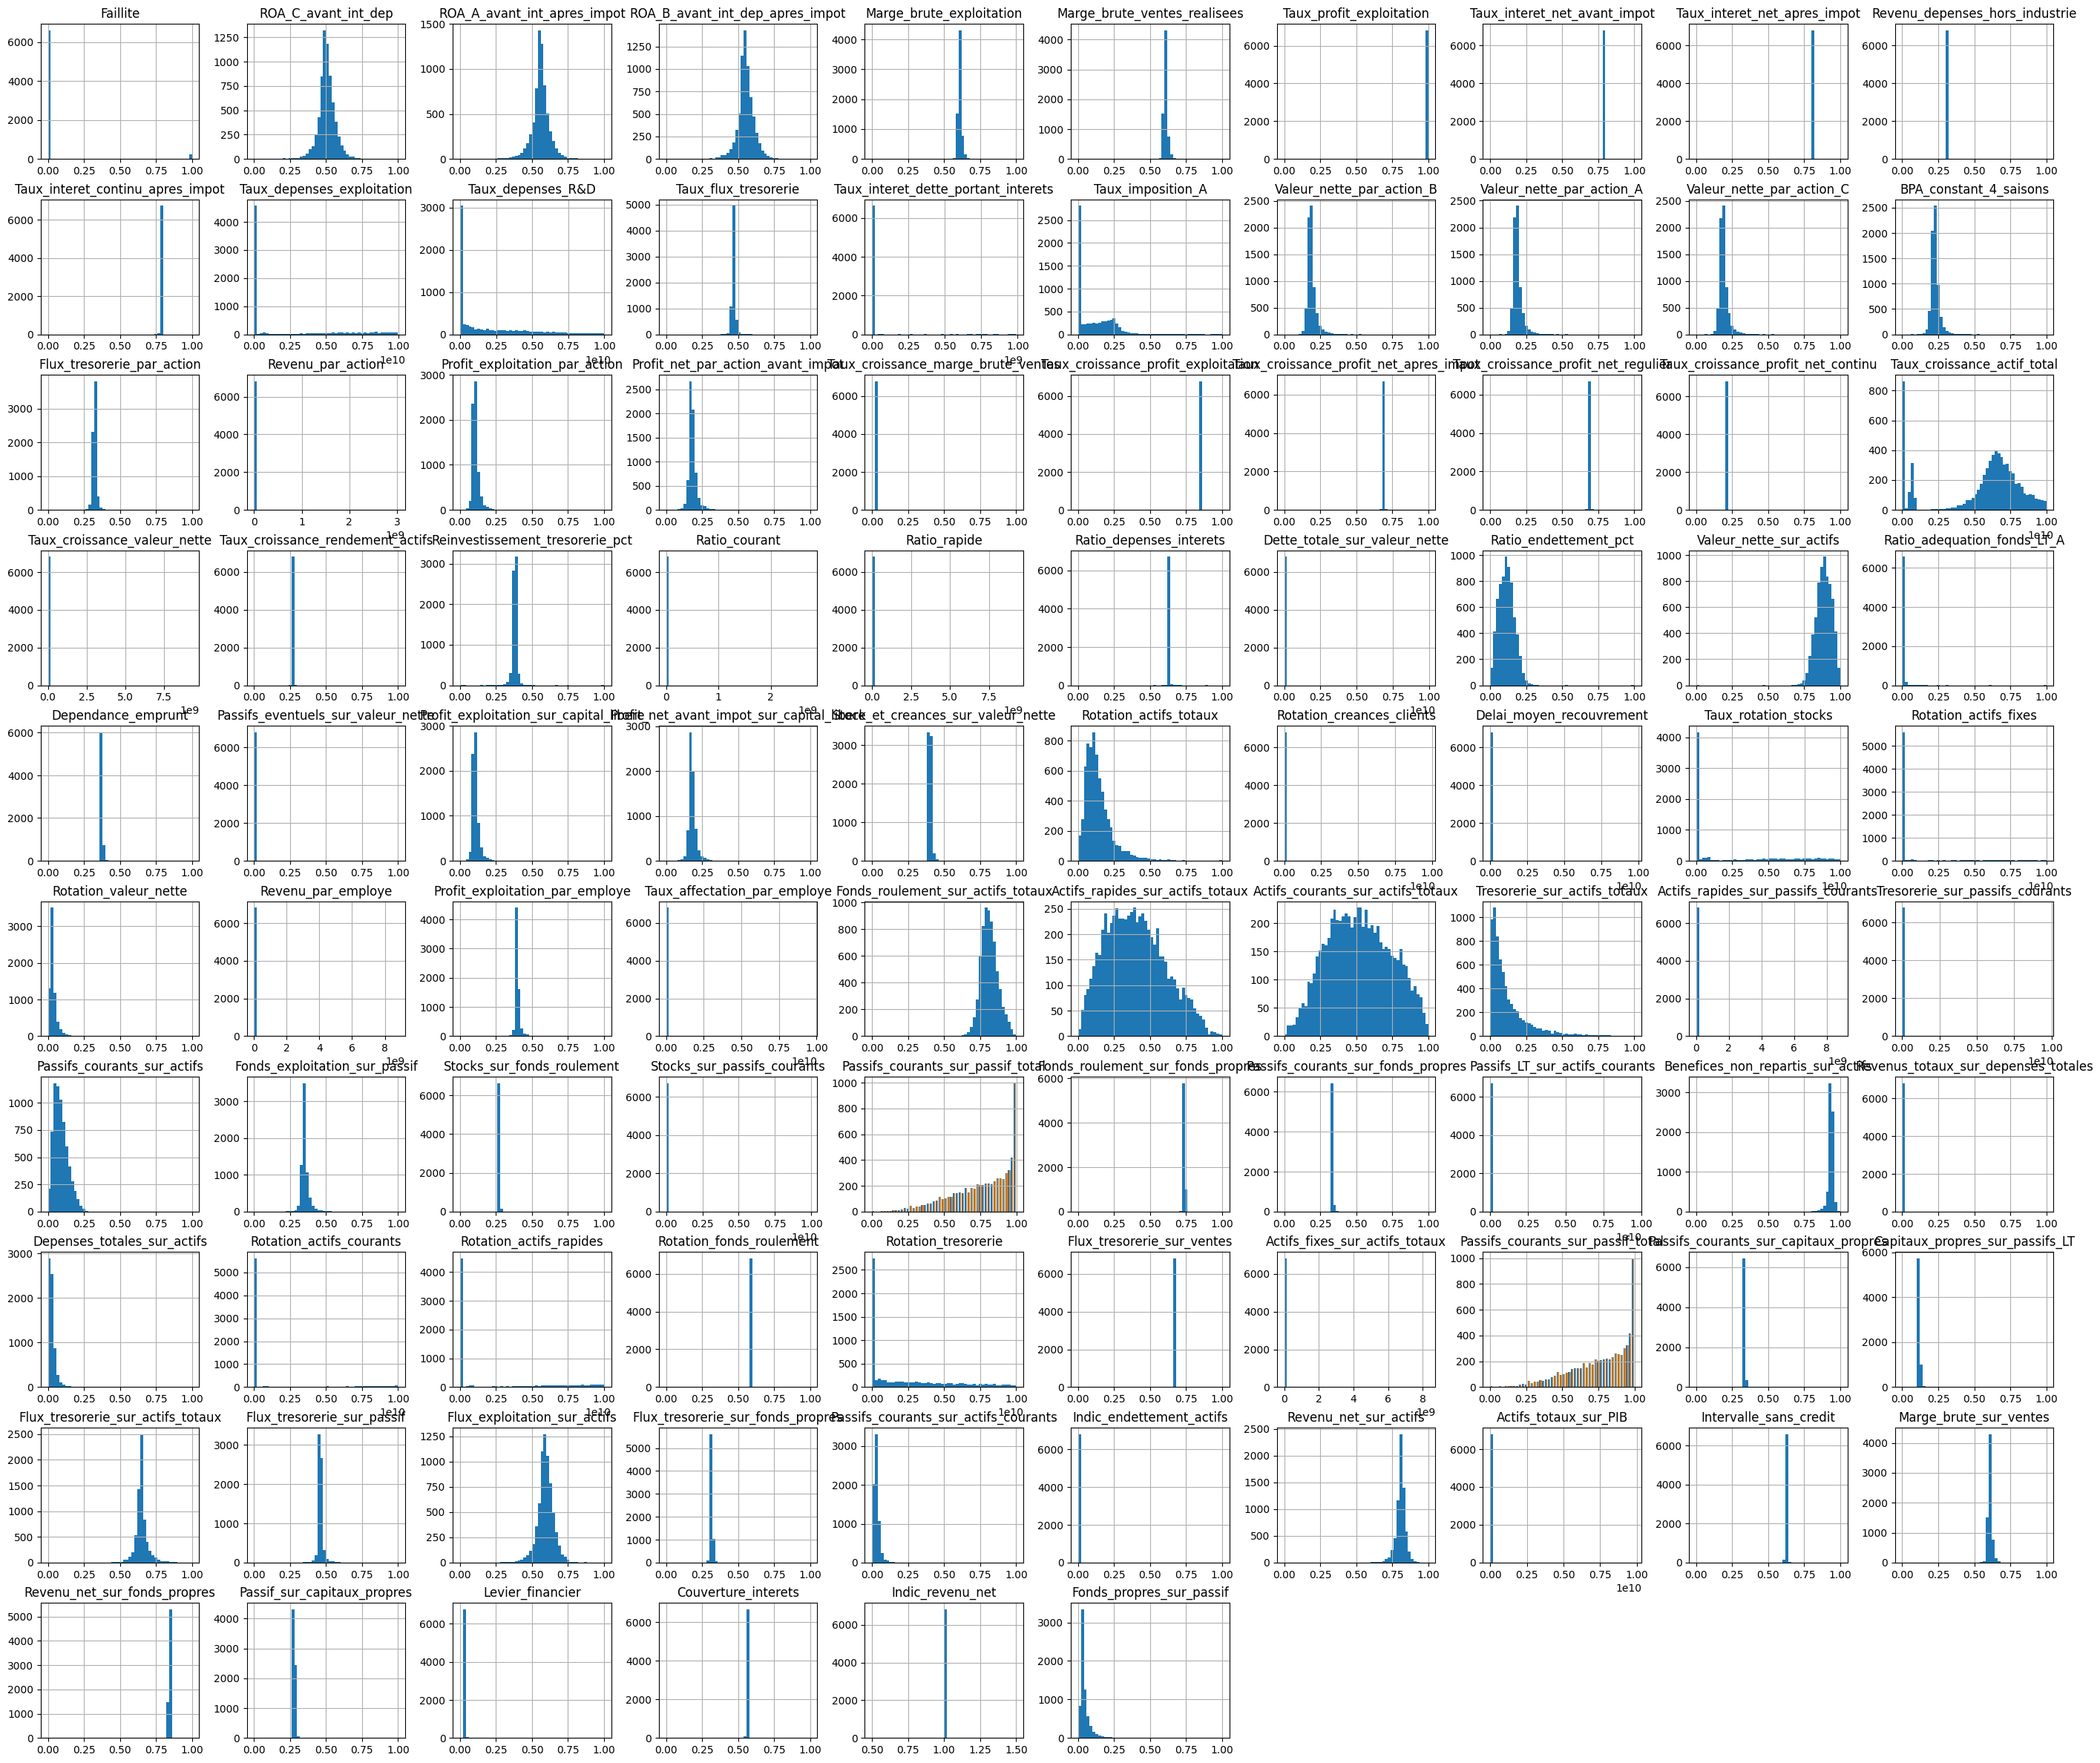

In [ ]:
# Looking at the histograms of numerical data
data.hist(figsize = (35,30), bins = 50)
plt.show()

C'est vraiment pas facile d'etudier 93 variables numériques..
Nous allons simplifier un peu l'analyse de ces variables numériques..
Allons y à l'analyse bi-variée entre ces variables..

In [ ]:
positive_corr = data[num_var].corrwith(data["Faillite"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = data[num_var].corrwith(data["Faillite"]).sort_values()[:6].index.tolist()

positive_corr = data[positive_corr + ["Faillite"]].copy()
negative_corr = data[negative_corr + ["Faillite"]].copy()

In [ ]:
def corrbargraph(x_value, y_value):

    plt.figure(figsize=(15,8))
    value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)
        sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])

    plt.tight_layout(pad=0.5)

/tmp/ipython-input-4121272132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])
/tmp/ipython-input-4121272132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])
/tmp/ipython-input-4121272132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])
/tmp/ipython-input-4121272132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is de

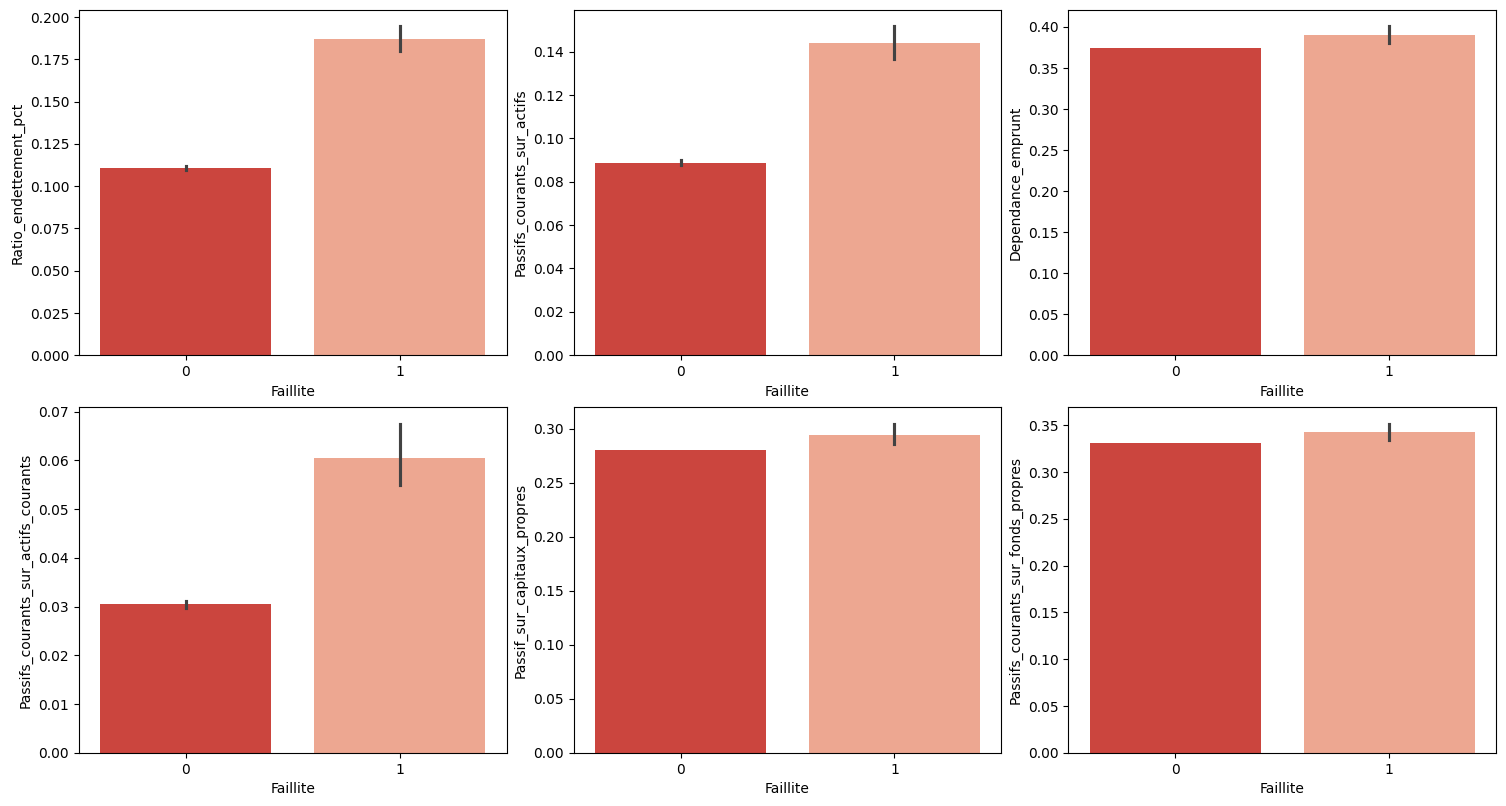

In [ ]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

/tmp/ipython-input-4121272132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])
/tmp/ipython-input-4121272132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])
/tmp/ipython-input-4121272132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])
/tmp/ipython-input-4121272132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is de

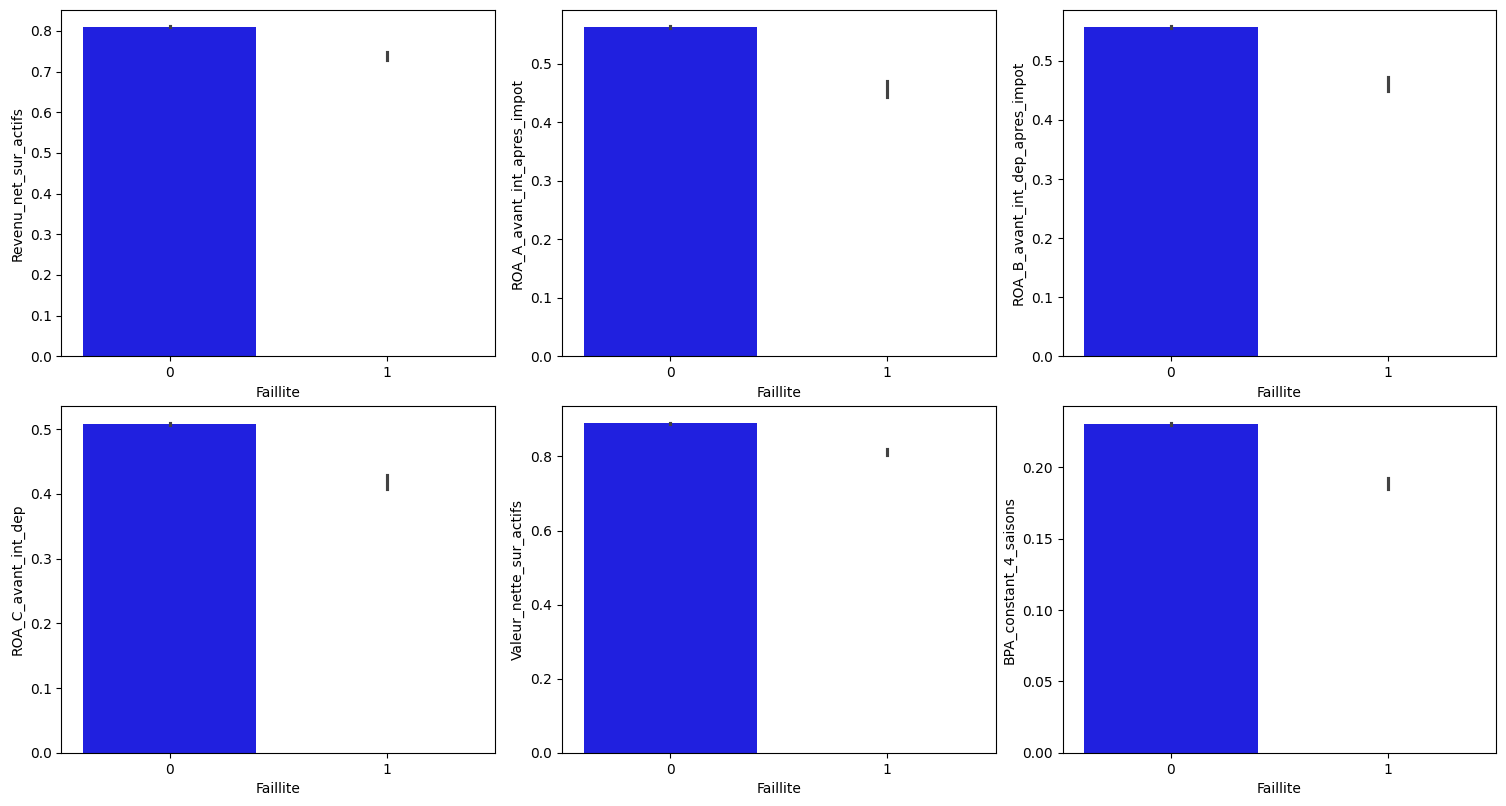

In [ ]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

<Axes: >

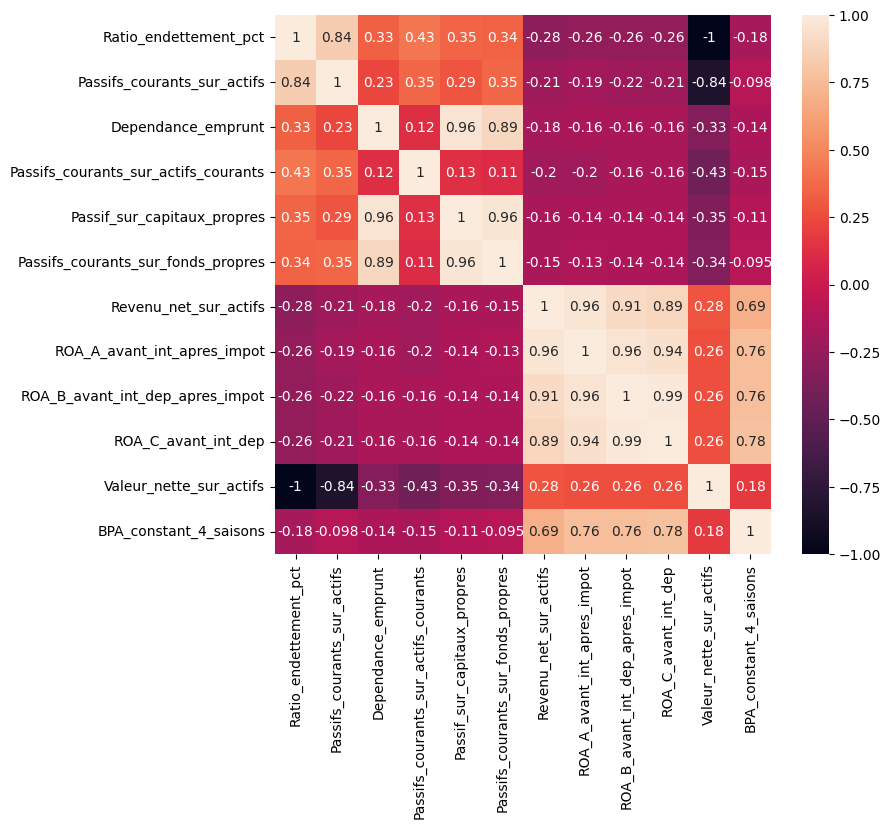

In [ ]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(data[relation].corr(),annot=True)

Bien, nous avons un aperçu des variables numériques qui ont un impact sur la variable cible.
Maintenant, nous pouvons passer à l'entraînement des différents modèles retenus pour répondre à la problématique métier

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes float
float_features = data.select_dtypes(include=['float64', 'float32']).columns

# Standardisation
scaler = StandardScaler()
data[float_features] = scaler.fit_transform(data[float_features])

In [ ]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):

    data = Dataframe.copy()

    X = data.drop('Faillite', axis=1)
    y = data['Faillite']

    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values

    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)

    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model)
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)

    print()
    print("Random Model Evaluation")

    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))

    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)

    return model

In [ ]:
print("K Nearest Neighbour")
TrainedModel = taining_without_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data,"K Nearest Neighbour")
Models = pd.concat(
    [Models, pd.DataFrame([TrainedModel])],
    ignore_index=True
)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.67      0.94      0.78        51

    accuracy                           0.98      1364
   macro avg       0.83      0.96      0.89      1364
weighted avg       0.99      0.98      0.98      1364



/tmp/ipython-input-605567433.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Models = pd.concat(


In [ ]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), data, "Logistic Regression")
Models = pd.concat(
    [Models, pd.DataFrame([TrainedModel])],
    ignore_index=True
)

Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.23      0.82      0.36        51

    accuracy                           0.89      1364
   macro avg       0.61      0.86      0.65      1364
weighted avg       0.96      0.89      0.92      1364



In [ ]:
print("DecisionTree Classifier")
TrainedModel = taining_without_feature_selection({"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}, DecisionTreeClassifier(), data, "DecisionTree Classifier")
Models = pd.concat(
    [Models, pd.DataFrame([TrainedModel])],
    ignore_index=True
)

DecisionTree Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1313
           1       0.18      0.90      0.31        51

    accuracy                           0.85      1364
   macro avg       0.59      0.87      0.61      1364
weighted avg       0.97      0.85      0.89      1364



In [ ]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), data, "Random Forest Classifier")
Models = pd.concat(
    [Models, pd.DataFrame([TrainedModel])],
    ignore_index=True
)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1313
           1       0.46      0.96      0.62        51

    accuracy                           0.96      1364
   macro avg       0.73      0.96      0.80      1364
weighted avg       0.98      0.96      0.96      1364



In [ ]:
print("Support Vector Classifier")
TrainedModel = taining_without_feature_selection({'C': [1,10,20],'kernel': ['rbf','linear']},  SVC(), data, "Support Vector Classifier")
Models = pd.concat(
    [Models, pd.DataFrame([TrainedModel])],
    ignore_index=True
)

Support Vector Classifier


Après entrainement, noous voyons clairement que les modèles les plus performants sont KNN et Random Forest..

In [ ]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
0,K Nearest Neighbour,98.02%,0.67,0.94,0.78,0.96
3,Random Forest Classifier,95.6%,0.46,0.96,0.62,0.96
4,Support Vector Classifier,94.43%,0.40,0.94,0.56,0.94
1,Logistic Regression,89.22%,0.23,0.82,0.36,0.86
2,DecisionTree Classifier,84.68%,0.18,0.90,0.31,0.87
